# Results of indexing tests on standard datasets

In [1]:
import datetime, pathlib, sys

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import ipywidgets as ipw

sys.path.insert(0, '../../src')
from indexing import ExtConvexHull

sns.set_style()
%matplotlib inline

## Helpers

In [2]:
def plot_dataset_index_stats(indexing_stats):
    markersize = 10
    plot_kwargs = {'FullIndex': {'label': 'Full', 'marker': '+', 'markersize':markersize},
#                   'AdjacentBlockIndex': {'label':'Neighbourhood Blocking', 'marker': 'o', 'markersize':markersize},
                   'NeighbourhoodBlockIndex': {'label':'Neighbourhood Blocking', 'marker': 'o', 'markersize':markersize},
                   'BlockIndex': {'label': 'Standard Blocking', 'marker': 's', 'markersize':markersize},
                   'SortedNeighbourhoodIndex': {'label': 'Sorted Neighbourhood', 'marker': '^', 'markersize':markersize},
                  }
    merged_indexer_classes = {'NeighbourhoodBlockIndex': ['BlockIndex']}
    indexing_stats = indexing_stats.copy()
    indexing_stats = indexing_stats[~indexing_stats['failed']]
#    indexing_stats['renamed_indexer_class'] = indexing_stats['indexer_class']
#    indexing_stats['renamed_indexer_class'][indexing_stats['renamed_indexer_class']=='AdjacentBlockIndex'] = 'NeighbourhoodBlockIndex'
#    indexing_stats = indexing_stats[indexing_stats['max_non_matches'].isnull() | (indexing_stats['max_non_matches'] == 0)]
#    indexing_stats = indexing_stats[indexing_stats['on'].map(lambda x:(x is np.nan) or 'soc_sec_id' not in x)]
    axis_vars = ['reduction_ratio', 'recall']
    plt.figure(figsize=(7,7))
    ax = plt.gca()
    for axis_name, axis_var in zip(['x', 'y'], axis_vars):
        getattr(ax, 'set_{axis_name}label'.format(**locals()))('{} (truncated)'.format(axis_var.replace('_', ' ').title()))
        getattr(ax, 'set_{axis_name}lim'.format(**locals()))(0.5, 1.05)
    for indexer_class, vals in indexing_stats.groupby('indexer_class'):
        vals = pd.concat([vals] + [indexing_stats[indexing_stats['indexer_class'] == cls] for cls in merged_indexer_classes.get(indexer_class, [])])
        cost_hull = ExtConvexHull(points = (1-vals[axis_vars]).values)
        frontier_points = pd.DataFrame((1-cost_hull.points[cost_hull.minimizing_points()]), columns=['x', 'y']).sort_values('x')
        ax.plot(*frontier_points.values.T, color='grey', **plot_kwargs[indexer_class])
#        ax.scatter(*[vals[col].values for col in axis_vars], color='grey', **plot_kwargs[indexer_class])
    plt.legend(loc='lower left', title='Index Type')
    plt.show()

In [3]:
def get_indexing_stats(database_key, cache_dir='.'):
    source_file = pathlib.Path(cache_dir) / 'indexing_stats_{database_key}.pickle'.format(**locals())
    return pd.read_pickle(str(source_file))

def get_database_keys(cache_dir='.'):
    prefix = 'indexing_stats_'
    suffix = '.pickle'
    return sorted(p.name.replace(prefix,'').replace(suffix, '') for p in pathlib.Path(cache_dir).glob('{prefix}*{suffix}'.format(prefix=prefix, suffix=suffix)))

cache_dir = '.'
#cache_dir = 'indexing_stats_imported'

def do_index_stats_plot(database_key):
    if database_key:
        plot_dataset_index_stats(get_indexing_stats(database_key, cache_dir=cache_dir))
    
ipw.interact(do_index_stats_plot, database_key = [None] + get_database_keys(cache_dir=cache_dir
                                                                           ));

In [4]:
stats = get_indexing_stats('febrl2', cache_dir=cache_dir).copy()
stats['renamed_indexer_class'] = stats['indexer_class']
stats['renamed_indexer_class'][stats['renamed_indexer_class']=='AdjacentBlockIndex'] = 'NeighbourhoodBlockIndex'
stats['recall+reduction'] = stats['recall'] + stats['reduction_ratio']
#stats = stats[stats['max_non_matches'].isnull() | (stats['max_non_matches'] == 0)]
#stats = stats[stats['on'].map(lambda x:(x is not np.nan) and {'soc_sec_id', 'date_of_birth_orig'} == set(x))]
#stats = stats[stats['max_non_matches']>0]
#stats = stats[(stats['recall']>0.5) & (stats['reduction_ratio']>0.5)]
stats_ABI = stats[stats['renamed_indexer_class'] == 'BlockIndex']
#stats_ABI = stats[stats['renamed_indexer_class'] == 'NeighbourhoodBlockIndex']
#stats_ABI = stats[stats['renamed_indexer_class'] == 'SortedNeighbourhoodIndex']
print(len(stats_ABI))
stats_ABI.sort_values('recall+reduction', ascending=False).head(50)

214


/home/dan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dataset,description,elapsed_seconds,failed,index_size,indexer_class,max_non_matches,max_nulls,max_rank_differences,on,precision,recall,reduction_ratio,window,renamed_indexer_class,recall+reduction
483,febrl2,BlockIndex (['soc_sec_id']),0.069761,False,1686.0,BlockIndex,NaN,NaN,NaN,[soc_sec_id],1.000000,0.871768,0.999865,NaN,BlockIndex,1.871633
189,febrl2,"BlockIndex (['date_of_birth_day', 'date_of_bir...",0.295529,False,5647.0,BlockIndex,NaN,NaN,NaN,"[date_of_birth_day, date_of_birth_year]",0.297149,0.867632,0.999548,NaN,BlockIndex,1.867180
204,febrl2,"BlockIndex (['date_of_birth_month', 'date_of_b...",0.337197,False,11812.0,BlockIndex,NaN,NaN,NaN,"[date_of_birth_month, date_of_birth_year]",0.142059,0.867632,0.999055,NaN,BlockIndex,1.866687
128,febrl2,"BlockIndex (['date_of_birth_day', 'date_of_bir...",0.395938,False,34249.0,BlockIndex,NaN,NaN,NaN,"[date_of_birth_day, date_of_birth_month]",0.048907,0.866081,0.997260,NaN,BlockIndex,1.863340
187,febrl2,"BlockIndex (['date_of_birth_day', 'date_of_bir...",0.320731,False,1979.0,BlockIndex,NaN,NaN,NaN,"[date_of_birth_day, date_of_birth_orig]",0.843355,0.862978,0.999842,NaN,BlockIndex,1.862820
115,febrl2,"BlockIndex (['date_of_birth_day', 'date_of_bir...",0.317954,False,1979.0,BlockIndex,NaN,NaN,NaN,"[date_of_birth_day, date_of_birth_month, date_...",0.843355,0.862978,0.999842,NaN,BlockIndex,1.862820
127,febrl2,"BlockIndex (['date_of_birth_month', 'date_of_b...",0.317666,False,1979.0,BlockIndex,NaN,NaN,NaN,"[date_of_birth_month, date_of_birth_orig, date...",0.843355,0.862978,0.999842,NaN,BlockIndex,1.862820
140,febrl2,"BlockIndex (['date_of_birth_month', 'date_of_b...",0.331411,False,1979.0,BlockIndex,NaN,NaN,NaN,"[date_of_birth_month, date_of_birth_orig]",0.843355,0.862978,0.999842,NaN,BlockIndex,1.862820
220,febrl2,"BlockIndex (['date_of_birth_orig', 'date_of_bi...",0.309447,False,1979.0,BlockIndex,NaN,NaN,NaN,"[date_of_birth_orig, date_of_birth_year]",0.843355,0.862978,0.999842,NaN,BlockIndex,1.862820
482,febrl2,BlockIndex (['date_of_birth_day']),1.800290,False,389619.0,BlockIndex,NaN,NaN,NaN,[date_of_birth_day],0.004335,0.873320,0.968824,NaN,BlockIndex,1.842144


In [5]:
cost_hull = ExtConvexHull(points = (1-stats_ABI[['reduction_ratio', 'recall']]).values)

In [6]:
cost_hull.points[cost_hull.minimizing_points()]

array([[  0.00000000e+00,   1.00000000e+00],
       [  3.11757552e-02,   1.26680455e-01],
       [  1.34906981e-04,   1.28231644e-01]])

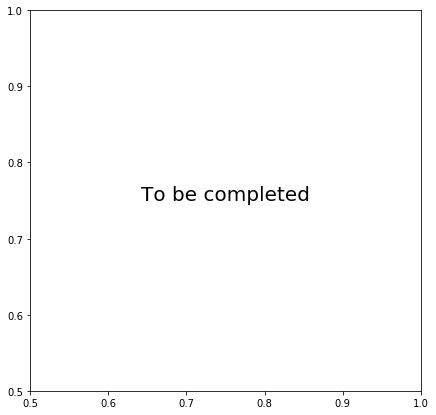

In [7]:
plt.figure(figsize=(7,7))
ax=plt.gca()
ax.set_xlim(0.5,1)
ax.set_ylim(0.5,1)
ax.text(0.75, 0.75, 'To be completed', ha='center', size=20)
plt.show();